# TED Talks Data exploration

Not too long ago, I made a half-joking bet with someone that I'd give a TED talk in the next five years. Having yet to make any progress towards that goal, I think exploring the past TED talks and understanding the characteristics of a popular talk is a good place to start. 

## Data

The TED Talks [dataset](https://www.kaggle.com/rounakbanik/ted-talks) contains information on all the audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017.

The data was compiled by Rounak Banik from the official TED website, published on Kaggle, and it contains two files:

 * ted_main.csv - Contains metadata on each talk and speaker. 
 * transcripts.csv - Contains transcript and URL information for TED Talks.

For this study, I'm focusing on the metadata for the talks, and not using the transcripts.

##### The data, ted_main.csv is a flat file where each row is a unique talk, and it contains the following variables for each talk:

Comments - the number of comments from users on the site.  
Description - a brief description of the talk.  
Duration - duration in seconds.  
Event - the event where the talk took place.    
Film date - a Unix timestamp of the film date.   
Languages - the number of languages in which the talk is available.  
Main speaker - the first named speaker of the talk.  
Name - the official name of the talk including speaker and title.  
Number of speakers - the number of speakers in the talk.  
Published date - a Unix timestamp of the date it was published on ted.com.  
Ratings - a dictionary of the various ratings given to the talk by viewers.  
Related talks - a list of dictionaries of recommended talks to watch next.  
Speaker occupation - the occupation of the main speaker.  
Tags - the themes assosciated with the talk.  
Title - the title of the talk.  
Url - the url of the talk.  
Views - the number of views.


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Let's read in the data and take a look at it

In [2]:
ted = pd.read_csv("ted_main.csv")

In [3]:
ted.shape

(2550, 17)

The data has 2550 observations and the 17 previously described columns.  
### Let's see what the head looks like

In [4]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [5]:
ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


Looking at the output of the describe method, you can see that for comments, duration, and views, the max values are much higher than the means. Getting a real picture of the data through summary statistics might be difficult due to the extreme values.  

### Let's take a look at some of the variables

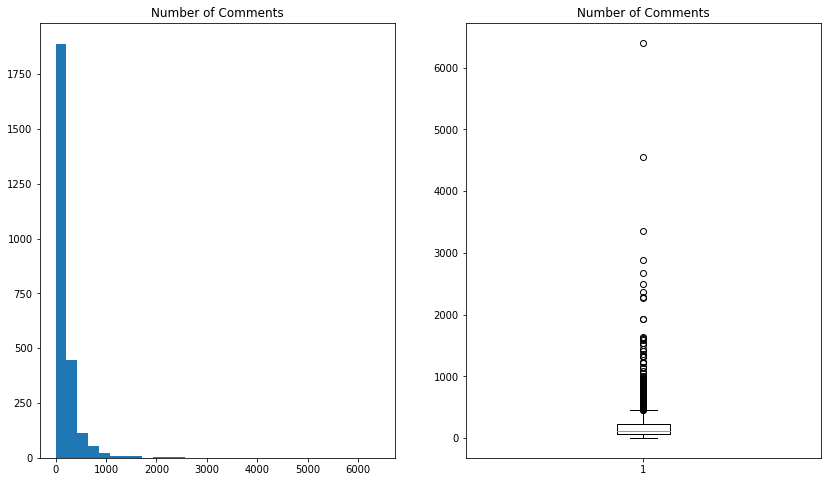

In [6]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['comments'], bins=30)
plt.title('Number of Comments')

plt.subplot(1, 2, 2)
plt.boxplot(ted['comments'])
plt.title('Number of Comments')

plt.show()

Uh oh, due to the extreme outliers, these plots are not very helpful. Let's see what it looks like with the upper quartile removed.

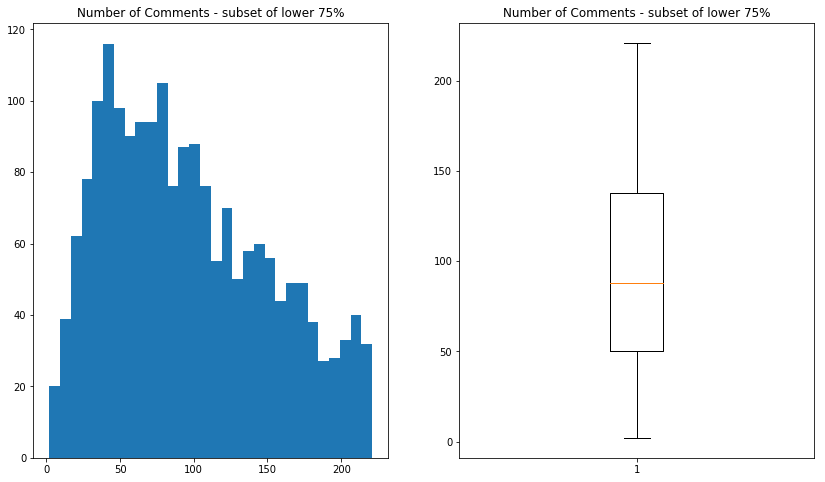

In [7]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['comments'][ted['comments'] < 221.75], bins=30)
plt.title('Number of Comments - subset of lower 75%')

plt.subplot(1, 2, 2)
plt.boxplot(ted['comments'][ted['comments'] < 221.75].reset_index(drop=True))
plt.title('Number of Comments - subset of lower 75%')

plt.show()

That's better! The plots are a lot more visually informative without the extreme values at the top.

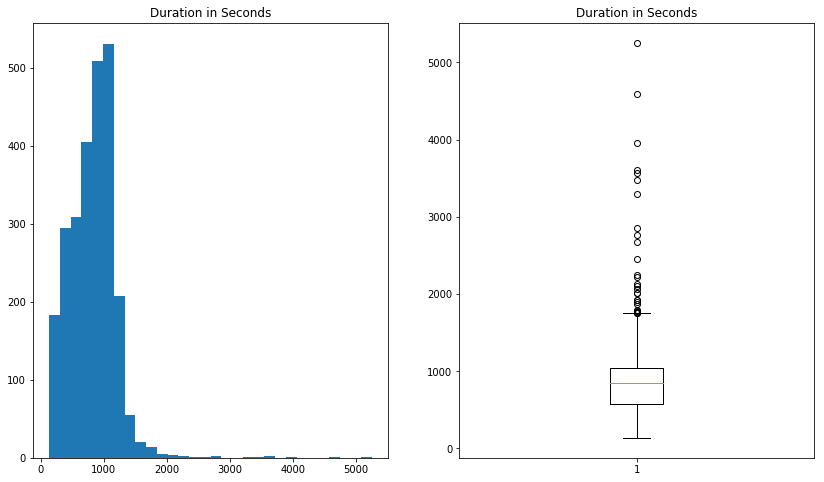

In [8]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['duration'], bins=30)
plt.title('Duration in Seconds')

plt.subplot(1, 2, 2)
plt.boxplot(ted['duration'])
plt.title('Duration in Seconds')

plt.show()

Wow! Some talks lasted way longer than the rest.  
Let's also see what the distribution looks like for talks that lasted less than 2000 seconds.

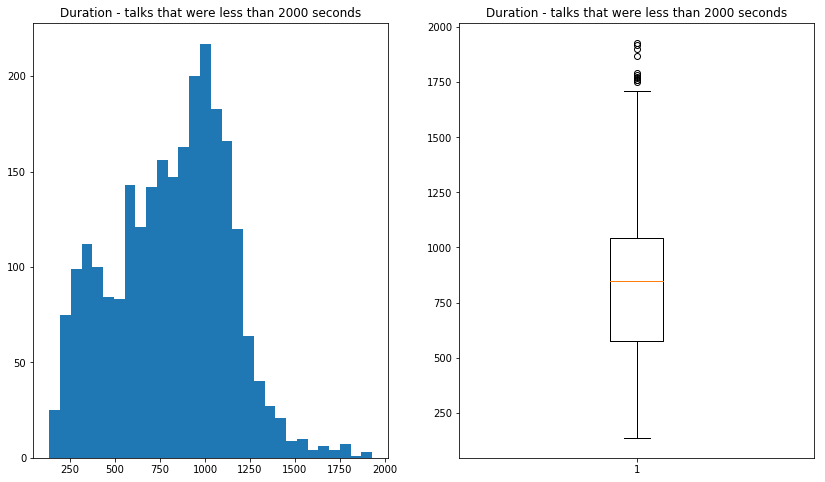

In [9]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['duration'][ted['duration'] < 2000], bins=30)
plt.title('Duration - talks that were less than 2000 seconds')

plt.subplot(1, 2, 2)
plt.boxplot(ted['duration'][ted['duration'] < 2000])
plt.title('Duration - talks that were less than 2000 seconds')

plt.show()

Without the extreme values, it's easier to get a visual idea of the duration of the talks. It looks like most talks were around 1000 seconds.

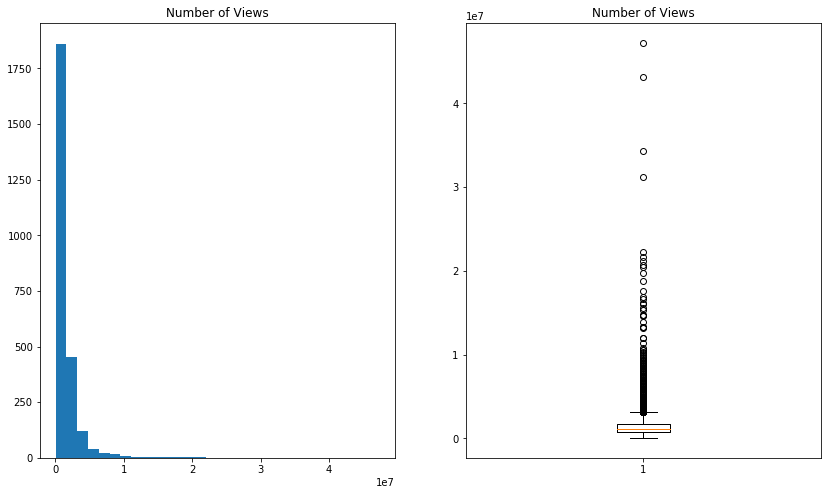

In [10]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['views'], bins=30)
plt.title('Number of Views')

plt.subplot(1, 2, 2)
plt.boxplot(ted['views'])
plt.title('Number of Views')

plt.show()

The distribution of the views looks very similar to the comments. Let's see what it looks like when we remove the upper quartile.

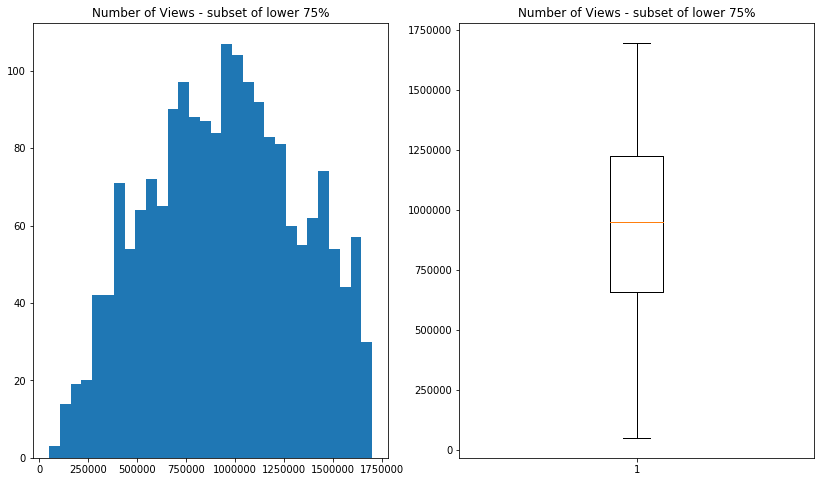

In [11]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['views'][ted['views'] < 1.700760e+06], bins=30)
plt.title('Number of Views - subset of lower 75%')

plt.subplot(1, 2, 2)
plt.boxplot(ted['views'][ted['views'] < 1.700760e+06].reset_index(drop=True))
plt.title('Number of Views - subset of lower 75%')

plt.show()

After removing the upper quartile, once again, the plot becomes more visually informative. 

# Analytic Questions

### 1. What are the most common tags?
If someone is going to give a TED Talk, having a topic sounds like a good idea. Now that we understand how some of the numeric variables are distributed, let's take a look at the tags column to see what types of topics are being talked about.  

The tags column is a string of the themes assosciated with the talk. To help us get an idea of what to talk about, let's see what the most common tags are.

In [12]:
import ast
from collections import Counter
import operator
#Tags is a stringified list that needs to be converted to a real list.
tags = ted['tags']
all_tags = []
for tag in tags:
    tag_list = ast.literal_eval(tag)
    all_tags += tag_list

tags_count = Counter(all_tags)
sorted_tags = sorted(tags_count.items(), key=operator.itemgetter(1), reverse=True)

sorted_tags[:20]

[('technology', 727),
 ('science', 567),
 ('global issues', 501),
 ('culture', 486),
 ('TEDx', 450),
 ('design', 418),
 ('business', 348),
 ('entertainment', 299),
 ('health', 236),
 ('innovation', 229),
 ('society', 224),
 ('art', 221),
 ('social change', 218),
 ('future', 195),
 ('communication', 191),
 ('creativity', 189),
 ('biology', 189),
 ('humanity', 182),
 ('collaboration', 174),
 ('environment', 165)]

Here we have a list of the top 20 most common tags. You can see that technology is the most common tag, which is not surprising considering that TED was originally a tech conference that gradually expanded into other areas. Looking at the list of the top 20 tags, you can get a feeling for the types of talks that get selected. 

### 2. Which ratings have the most views?
The ratings column is a dictionary of 14 possible ratings that viewers can select for each talk. They are:
* Informative 
* Confusing 
* Jaw-dropping 
* Ingenious 
* Persuasive 
* Inspiring 
* Longwinded 
* Unconvincing 
* Fascinating 
* OK 
* Beautiful 
* Courageous 
* Funny 
* Obnoxious  

Let's take a look at how viewers have rated the talks, and how that relates to number of views:

In [13]:
possible_ratings = ["Informative", "Confusing", "Jaw-dropping", "Ingenious", "Persuasive", "Inspiring", "Longwinded", "Unconvincing", "Fascinating", "OK", "Beautiful", "Courageous", "Funny", "Obnoxious"]

ted['ratings'] = ted['ratings'].apply(ast.literal_eval)

In [14]:
def get_rating_count(x, rating):
    for i in x:
        if i['name'] == rating:
            return i['count']

In [15]:
for index, item in enumerate(possible_ratings):
    ted[item] = ted['ratings'].apply(lambda x: get_rating_count(x, item))

In [16]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'Informative', 'Confusing', 'Jaw-dropping', 'Ingenious',
       'Persuasive', 'Inspiring', 'Longwinded', 'Unconvincing', 'Fascinating',
       'OK', 'Beautiful', 'Courageous', 'Funny', 'Obnoxious'],
      dtype='object')

In [17]:
ratings = ted[["Informative", "Confusing", "Jaw-dropping", "Ingenious", "Persuasive", "Inspiring", "Longwinded", "Unconvincing", "Fascinating", "OK", "Beautiful", "Courageous", "Funny", "Obnoxious"]]

In [18]:
ratings.sum()

Informative      887434
Confusing         53436
Jaw-dropping     377547
Ingenious        384386
Persuasive       561220
Inspiring       1352048
Longwinded        83344
Unconvincing     134558
Fascinating      801119
OK               207157
Beautiful        490349
Courageous       420045
Funny            393895
Obnoxious         66303
dtype: int64

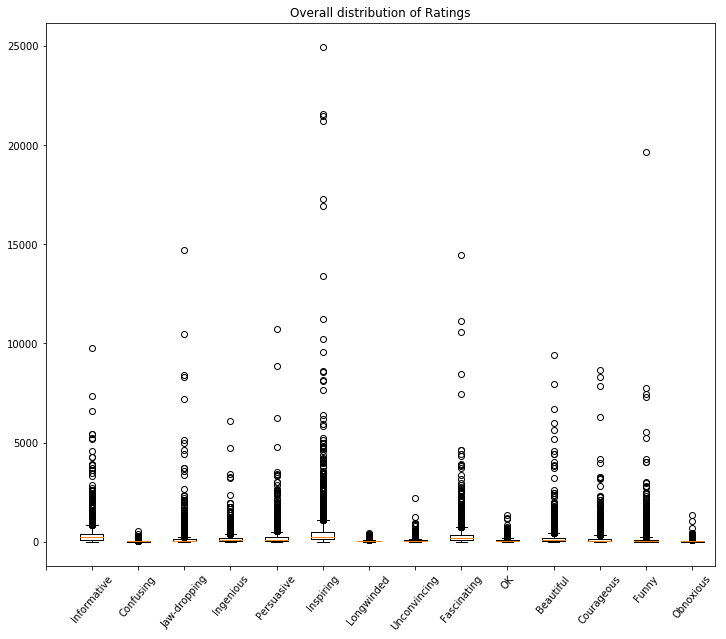

In [19]:
plt.figure(figsize=(12,10))
plt.boxplot(ratings.values, widths=0.5)
plt.title('Overall distribution of Ratings')
plt.xticks(np.arange(15), ("", "Informative", "Confusing", "Jaw-dropping", "Ingenious", "Persuasive", "Inspiring", "Longwinded", "Unconvincing", "Fascinating", "OK", "Beautiful", "Courageous", "Funny", "Obnoxious"), rotation=50, ha='center')

plt.show()

In [20]:
ratings.describe()

,Informative,Confusing,Jaw-dropping,Ingenious,Persuasive,Inspiring,Longwinded,Unconvincing,Fascinating,OK,Beautiful,Courageous,Funny,Obnoxious
count,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000
mean,348.013333,20.955294,148.057647,150.739608,220.086275,530.214902,32.683922,52.767843,314.164314,81.238039,192.293725,164.723529,154.468627,26.001176
std,540.225980,31.552561,553.879757,283.800437,466.774759,1314.509665,41.608618,91.678632,624.535809,90.321214,477.375664,433.805453,589.137728,53.443249
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.250000,5.000000,18.250000,26.000000,37.000000,113.000000,9.000000,12.000000,79.000000,32.000000,26.000000,20.000000,8.000000,6.000000
50%,212.000000,12.000000,42.000000,69.000000,97.000000,233.500000,19.000000,27.000000,162.000000,55.500000,68.000000,51.000000,21.000000,13.000000
75%,401.000000,24.000000,110.750000,170.750000,225.750000,497.750000,41.000000,60.000000,344.000000,99.000000,190.750000,149.000000,92.000000,27.000000
max,9787.000000,531.000000,14728.000000,6073.000000,10704.000000,24924.000000,447.000000,2194.000000,14447.000000,1341.000000,9437.000000,8668.000000,19645.000000,1361.000000


In [21]:
ted['total_ratings'] = ratings.sum(axis=1)

In [22]:
top_20_viewed = ted.sort_values(by=['views'], ascending=False)[:20]

top_20_viewed

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Inspiring,Longwinded,Unconvincing,Fascinating,OK,Beautiful,Courageous,Funny,Obnoxious,total_ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,24924,387,300,10581,1174,4573,3253,19645,209,93850
1346,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,1340668800,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,1349103608,...,21210,338,335,11111,1129,3232,6305,938,155,65968
677,1930,Simon Sinek has a simple but powerful model fo...,1084,TEDxPuget Sound,1253145600,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,1272965460,...,21564,390,930,7440,1341,1640,1161,390,294,56779
837,1927,Brené Brown studies human connection -- our ab...,1219,TEDxHouston,1275782400,52,Brené Brown,Brené Brown: The power of vulnerability,1,1293115500,...,21444,283,233,4638,500,7942,8280,5225,113,60078
452,354,"""Bonk"" author Mary Roach delves into obscure s...",1003,TED2009,1233878400,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,1242781200,...,154,184,212,1752,715,213,519,4166,209,11273
1776,297,"Have you ever felt like you're talking, but no...",598,TEDGlobal 2013,1370822400,45,Julian Treasure,Julian Treasure: How to speak so that people w...,1,1403879897,...,4133,48,153,1801,650,735,270,810,43,17386
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,...,16918,398,550,14447,636,9437,7842,966,356,70665
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,...,5211,285,377,1350,441,706,721,1102,335,15356
2114,150,"Suspicious emails: unclaimed insurance bonds, ...",588,TEDGlobal>Geneva,1449532800,43,James Veitch,James Veitch: This is what happens when you re...,1,1452269020,...,417,45,63,939,143,229,240,7731,60,12366
1416,846,Cameron Russell admits she won “a genetic lott...,577,TEDxMidAtlantic,1351296000,43,Cameron Russell,Cameron Russell: Looks aren't everything. Beli...,1,1358352354,...,1617,92,231,632,612,924,2306,302,77,8620


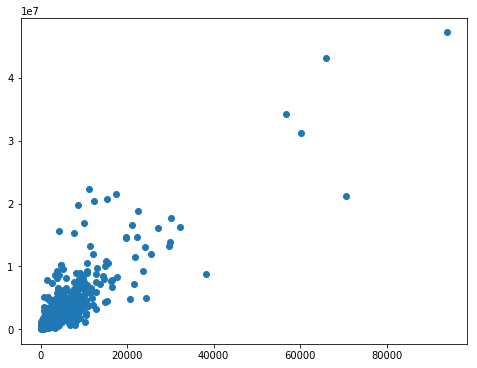

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(ted['total_ratings'], ted['views'])

plt.show()

In [24]:
for rating in possible_ratings:
    ted[rating + "_percent"] = ted[rating] / ted['total_ratings']

In [33]:
percent_columns = []
for rating in possible_ratings:
    percent_columns += [rating + "_percent"]
    
for column in percent_columns:
    plt.scatter(ted[column], ted['views'])

['Informative_percent',
 'Confusing_percent',
 'Jaw-dropping_percent',
 'Ingenious_percent',
 'Persuasive_percent',
 'Inspiring_percent',
 'Longwinded_percent',
 'Unconvincing_percent',
 'Fascinating_percent',
 'OK_percent',
 'Beautiful_percent',
 'Courageous_percent',
 'Funny_percent',
 'Obnoxious_percent']

In [25]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Persuasive_percent,Inspiring_percent,Longwinded_percent,Unconvincing_percent,Fascinating_percent,OK_percent,Beautiful_percent,Courageous_percent,Funny_percent,Obnoxious_percent
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,0.114054,0.265573,0.004124,0.003197,0.112744,0.012509,0.048727,0.034662,0.209323,0.002227
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,0.091281,0.140668,0.038488,0.087875,0.044959,0.069142,0.019755,0.047343,0.185286,0.044619
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,0.081445,0.081445,0.027620,0.036827,0.058782,0.051700,0.021246,0.015935,0.341360,0.050283
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,0.123391,0.287017,0.014217,0.009657,0.035408,0.022800,0.078058,0.203863,0.015826,0.009388
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,0.099219,0.112920,0.004294,0.002615,0.179781,0.009680,0.036768,0.012412,0.054254,0.002381


In [26]:
len(ted['event'].unique())

355

In [27]:
print(ted['event'].unique())

['TED2006' 'TED2004' 'TED2005' 'TEDGlobal 2005' 'TEDSalon 2006' 'TED2003'
 'TED2007' 'TED2002' 'TEDGlobal 2007' 'TEDSalon 2007 Hot Science'
 'Skoll World Forum 2007' 'TED2008' 'TED1984' 'TED1990' 'DLD 2007'
 'EG 2007' 'TED1998' 'LIFT 2007' 'TED Prize Wish'
 'TEDSalon 2009 Compassion' 'Chautauqua Institution' 'Serious Play 2008'
 'Taste3 2008' 'TED2001' 'TED in the Field' 'TED2009' 'EG 2008'
 'Elizabeth G. Anderson School' 'TEDxUSC' 'TED@State' 'TEDGlobal 2009'
 'TEDxKC' 'TEDIndia 2009' 'TEDSalon London 2009'
 'Justice with Michael Sandel' 'Business Innovation Factory' 'TEDxTC'
 'Carnegie Mellon University' 'Stanford University' 'AORN Congress'
 'University of California' 'TEDMED 2009' 'Royal Institution'
 'Bowery Poetry Club' 'TEDxSMU' 'Harvard University' 'TEDxBoston 2009'
 'TEDxBerlin' 'TED2010' 'TEDxAmsterdam' 'World Science Festival' 'BBC TV'
 'Arbejdsglaede Live' 'Web 2.0 Expo 2008' 'TEDxNASA'
 'Michael Howard Studios' 'DICE Summit 2010'
 "Eric Whitacre's Virtual Choir" 'Mission B

In [28]:
len(ted['main_speaker'].unique())

2156

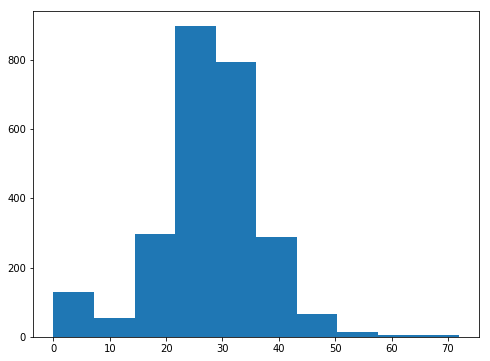

In [29]:
plt.figure(figsize=(8,6))
plt.hist(ted['languages'])
plt.show()

In [30]:
max(ted['views'])

47227110

In [31]:
min(ted['views'])

50443

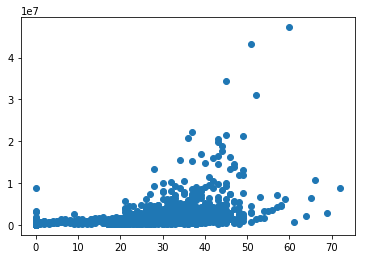

In [32]:
plt.scatter(ted['languages'], ted['views'])

possible analytic questions: 
What are the most common topics (tags), and what topics recieve the most views?

Which ratings have the most total views? 

Is there a correlation between publish date and total views? Do older talks have more views because they've been on the site longer or do newer talks have more views as a result of the fan base growing over time. 

Which Ted events have been the most popular, least popular in terms of views?



Possible ratings, User is asked to select up to 3, if only one is chosen it will count 3 times:

Informative    Confusing  Jaw-dropping    Ingenious  Persuasive    Inspiring  Longwinded    Unconvincing  Fascinating    OK  Beautiful    Courageous  Funny    Obnoxious

Future research ideas:

build a recommendation tool to suggest what talks the viewer would like.
Predict how many views a talk will get.
